In [1]:
from rdkit import Chem
from rdkit.Chem.Draw  import IPythonConsole
from rdkit.Chem import Draw

In [2]:
mol1 = Chem.MolFromSmiles('COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1')
mol2 = Chem.MolFromSmiles('C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1')


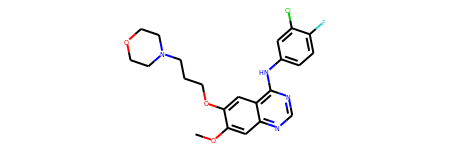

In [3]:
mol1

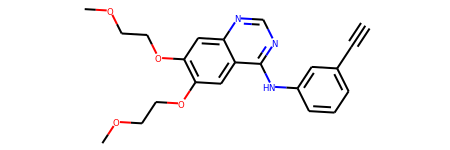

In [4]:
mol2


In [5]:

from rdkit.Chem import Descriptors


In [6]:
print (Descriptors.HeavyAtomCount(mol1))


31


We use the SDMolSupplier to read in groups of molecules from an SDF formatted file.

In [7]:
molecules = Chem.SDMolSupplier("data/PubChem_substance_text_covid-19_records.sdf")

In [8]:
molecules

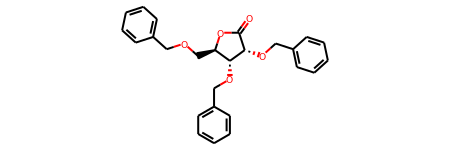

In [9]:
molecules[0]

In [10]:
for mol in molecules:
    print(mol.GetNumAtoms())
    

31
0
29
23
0
18
43
50
28
0
0
70
36
0
22
38
29
22
0
39
54
0
31
18
28
17
32
66
0
0
27
0
35
36
65
0
23
0
0
40
26
19
26
0
49
0
0
251
50
65
37
38
33
23
57
37
0
0
28
31
26
42
30


In [11]:
print(Chem.MolToMolBlock(molecules[0]))

405046128
     RDKit          2D

 31 34  0  0  1  0  0  0  0  0999 V2000
    7.3916    2.3112    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    7.8916   -0.2276    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    9.6517    1.0511    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    5.3884    1.7202    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    8.9794    3.1202    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    7.8916    0.7724    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.0826    1.3601    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.7006    1.3601    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.1316    1.0511    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.3916    2.3112    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.0256   -0.7276    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   10.3948    1.7202    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.0256   -1.7276    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.4374    1.

In [12]:
molecular_weight = Descriptors.HeavyAtomMolWt(molecules[0])
print(molecular_weight)

392.28100000000023


In [13]:
results={"lipinski_true":0,
        "lipinski_false":0}

molecules = Chem.SDMolSupplier('data/PubChem_substance_text_covid-19_records.sdf')
print("Number of molecules read from file= ", len(molecules))

#this chunk goes through the molecules read in from the sdf file
#and calculates descriptors linked to the Lipinski rule of 5s. It
#then prints out which molecules are not Lipinski-compliant.
for mol in molecules:
    molecular_weight = Descriptors.ExactMolWt(mol)
    logp = Descriptors.MolLogP(mol)
    h_bond_donor = Descriptors.NumHDonors(mol)
    h_bond_acceptors = Descriptors.NumHAcceptors(mol)
    if molecular_weight <= 500 and logp <= 5 and h_bond_donor <= 5 and h_bond_acceptors <= 5 :
        results["lipinski_true"] += 1
    else:
        results["lipinski_false"] += 1
        print("Not Lipinski compliant: ", mol.GetProp('_Name'))
print(results)



Number of molecules read from file=  63
Not Lipinski compliant:  135650118
Not Lipinski compliant:  405067330
Not Lipinski compliant:  405067314
Not Lipinski compliant:  252827462
Not Lipinski compliant:  178103417
Not Lipinski compliant:  405067337
Not Lipinski compliant:  223366192
Not Lipinski compliant:  178103048
Not Lipinski compliant:  187051772
Not Lipinski compliant:  187051836
Not Lipinski compliant:  375973224
Not Lipinski compliant:  405067328
Not Lipinski compliant:  404859153
Not Lipinski compliant:  178103448
Not Lipinski compliant:  178103944
Not Lipinski compliant:  178103484
Not Lipinski compliant:  310264693
Not Lipinski compliant:  178100871
Not Lipinski compliant:  178101031
Not Lipinski compliant:  405067326
Not Lipinski compliant:  223366123
Not Lipinski compliant:  405067310
Not Lipinski compliant:  387271627
Not Lipinski compliant:  135651229
Not Lipinski compliant:  178102653
Not Lipinski compliant:  223366205
Not Lipinski compliant:  385612237
Not Lipinski co

In [14]:
from rdkit import DataStructs
from rdkit import Chem
import numpy as np

list_of_fps = [Chem.RDKFingerprint(i) for i in molecules]
matrix = np.zeros([len(list_of_fps),len(list_of_fps)])

for i in range(len(list_of_fps)):
    for j in range(len(list_of_fps)):
        tani = DataStructs.FingerprintSimilarity(list_of_fps[i],list_of_fps[j])
        matrix[i][j] = tani
print(list_of_fps[0].ToBitString())
print(matrix)

0010010010101010000110111100001000000010000000011000010010010100100010000010110000000000000111000100000100000000000000011100001000000000000111101100101000001100011100000000010010011000000011010011001001100110001000010001010001100110000000001000000000100100000000010010000110000100000000100010011100001001000010001100100111001011001100001001010010100100000111000100001100001100000000000000000111101000000000010001100000100000000000011001000001001000100000101000000000000000000000000010010000010000100010100000001011001001100000100000000100100010110000001000001010100001100100000010000000001000000111100110000000000000001001010100000100000000001000011100100111100000000000000000000110000100110000000011010010001100000001000101000000010000010100001001100101000001010011100001100000100100000001001001000100000000010010010001010000110010000000000111000000001011110100001000000000110000101000000110000000001100000100000001101100110010011000010100001000101000110010000000000011010000011100110000000001000000